In [1]:
!wget https://datahack-prod.s3.amazonaws.com/train_file/train_HK6lq50.csv

--2020-04-30 16:17:54--  https://datahack-prod.s3.amazonaws.com/train_file/train_HK6lq50.csv
Resolving datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)... 52.219.66.124
Connecting to datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)|52.219.66.124|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5422426 (5.2M) [text/csv]
Saving to: ‘train_HK6lq50.csv’

train_HK6lq50.csv   100%[===================>]   5.17M  6.03MB/s    in 0.9s    

2020-04-30 16:17:56 (6.03 MB/s) - ‘train_HK6lq50.csv’ saved [5422426/5422426]



In [2]:
!wget https://datahack-prod.s3.amazonaws.com/test_file/test_wF0Ps6O.csv

--2020-04-30 16:18:00--  https://datahack-prod.s3.amazonaws.com/test_file/test_wF0Ps6O.csv
Resolving datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)... 52.219.66.60
Connecting to datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)|52.219.66.60|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2260254 (2.2M) [text/csv]
Saving to: ‘test_wF0Ps6O.csv’

test_wF0Ps6O.csv    100%[===================>]   2.16M  2.94MB/s    in 0.7s    

2020-04-30 16:18:01 (2.94 MB/s) - ‘test_wF0Ps6O.csv’ saved [2260254/2260254]



In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [0]:
train = pd.read_csv('train_HK6lq50.csv')
test = pd.read_csv('test_wF0Ps6O.csv')

In [5]:
train.head(5)

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y_1,Y,136,150,offline,intermediate,9389,M,Matriculation,3,24.0,5,N,1.0,0
1,16523_44,T_1,T,131,44,offline,easy,16523,F,High School Diploma,4,26.0,2,N,3.0,1
2,13987_178,Z_2,Z,120,178,online,easy,13987,M,Matriculation,1,40.0,1,N,2.0,1
3,13158_32,T_2,T,117,32,offline,easy,13158,F,Matriculation,3,NaN,4,N,1.0,1
4,10591_84,V_3,V,131,84,offline,intermediate,10591,F,High School Diploma,1,42.0,2,N,4.0,1


In [6]:
test.head(5)

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating
0,1626_45,T_1,T,131,45,offline,intermediate,1626,F,Matriculation,3,46.0,2,N,4.0
1,11020_130,Y_3,Y,135,130,online,easy,11020,M,Bachelors,3,NaN,4,N,4.0
2,12652_146,Y_2,Y,120,146,online,easy,12652,M,Matriculation,3,NaN,2,N,3.0
3,7038_72,V_4,V,122,72,offline,vary hard,7038,F,High School Diploma,1,NaN,2,N,2.0
4,888_71,V_4,V,122,71,offline,intermediate,888,F,Matriculation,3,NaN,2,N,2.0


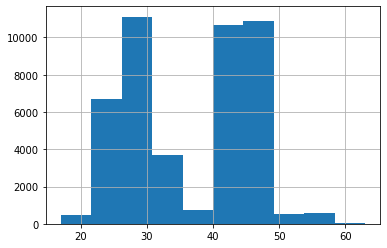

In [7]:
train['age'].hist()

In [8]:
train.isnull().sum(),test.isnull().sum(),train.shape,test.shape

(id                               0
 program_id                       0
 program_type                     0
 program_duration                 0
 test_id                          0
 test_type                        0
 difficulty_level                 0
 trainee_id                       0
 gender                           0
 education                        0
 city_tier                        0
 age                          27729
 total_programs_enrolled          0
 is_handicapped                   0
 trainee_engagement_rating       77
 is_pass                          0
 dtype: int64, id                               0
 program_id                       0
 program_type                     0
 program_duration                 0
 test_id                          0
 test_type                        0
 difficulty_level                 0
 trainee_id                       0
 gender                           0
 education                        0
 city_tier                        0
 age          

In [9]:
train.dtypes

id                            object
program_id                    object
program_type                  object
program_duration               int64
test_id                        int64
test_type                     object
difficulty_level              object
trainee_id                     int64
gender                        object
education                     object
city_tier                      int64
age                          float64
total_programs_enrolled        int64
is_handicapped                object
trainee_engagement_rating    float64
is_pass                        int64
dtype: object

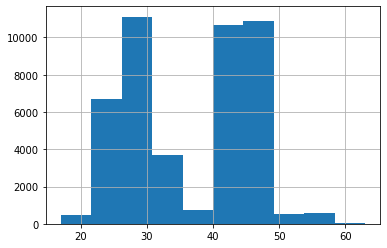

In [10]:
train['age'].hist()

In [0]:
train['age']=train['age'].fillna(train['age'].mean())
test['age']=test['age'].fillna(test['age'].mean())
#train['age']=train['age'].fillna(method='bfill')
#test['age']=test['age'].fillna(method='bfill')

In [12]:
train['trainee_engagement_rating'].unique()

array([ 1.,  3.,  2.,  4.,  5., nan])

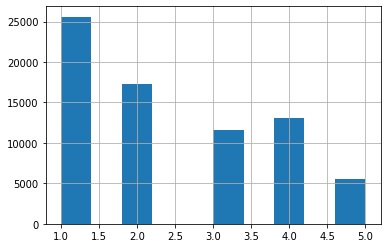

In [13]:
train['trainee_engagement_rating'].hist()

In [0]:
train['trainee_engagement_rating']=train['trainee_engagement_rating'].fillna(method='bfill')
test['trainee_engagement_rating']=test['trainee_engagement_rating'].fillna(method='bfill')

In [0]:
o1=test['id']

In [0]:
train['id']=train['id'].astype(int)
test['id']=test['id'].astype(int)

In [0]:
train['program_id']=train.program_id.str.extract('(\d+)')
test['program_id']=test.program_id.str.extract('(\d+)')

In [0]:
loc = np.append(train['program_id'].values, test['program_id'].values, axis=0)
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
l.fit(list(set(loc)))
train['program_id']=l.transform(train['program_id'])
test['program_id']=l.transform(test['program_id'])

In [0]:
loc = np.append(train['program_type'].values, test['program_type'].values, axis=0)
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
l.fit(list(set(loc)))
train['program_type']=l.transform(train['program_type'])
test['program_type']=l.transform(test['program_type'])

In [0]:
loc = np.append(train['test_type'].values, test['test_type'].values, axis=0)
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
l.fit(list(set(loc)))
train['test_type']=l.transform(train['test_type'])
test['test_type']=l.transform(test['test_type'])

In [0]:
loc = np.append(train['difficulty_level'].values, test['difficulty_level'].values, axis=0)
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
l.fit(list(set(loc)))
train['difficulty_level']=l.transform(train['difficulty_level'])
test['difficulty_level']=l.transform(test['difficulty_level'])

In [0]:
loc = np.append(train['gender'].values, test['gender'].values, axis=0)
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
l.fit(list(set(loc)))
train['gender']=l.transform(train['gender'])
test['gender']=l.transform(test['gender'])

In [0]:
loc = np.append(train['education'].values, test['education'].values, axis=0)
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
l.fit(list(set(loc)))
train['education']=l.transform(train['education'])
test['education']=l.transform(test['education'])

In [0]:
loc = np.append(train['is_handicapped'].values, test['is_handicapped'].values, axis=0)
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
l.fit(list(set(loc)))
train['is_handicapped']=l.transform(train['is_handicapped'])
test['is_handicapped']=l.transform(test['is_handicapped'])

In [0]:
train_df=train

In [0]:
X = train_df.drop(labels=['is_pass'], axis=1)
y = train_df['is_pass'].values

from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.15, random_state=42)

In [27]:
y = train.is_pass
corr = pd.concat(objs=[X, y], axis=1).corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
id,1.00,-0.21,0.71,0.20,0.73,0.13,-0.13,0.52,0.21,0.07,-0.00,0.03,-0.10,0.00,0.30,0.11
program_id,-0.21,1.00,-0.03,-0.42,-0.22,0.11,0.02,-0.35,-0.08,0.01,0.01,0.03,0.07,0.01,0.02,0.03
program_type,0.71,-0.03,1.00,0.13,0.98,0.17,-0.19,0.08,0.31,0.08,-0.01,-0.02,-0.12,0.03,0.35,0.08
program_duration,0.20,-0.42,0.13,1.00,0.20,-0.07,0.01,0.15,0.11,-0.01,-0.02,-0.01,-0.01,-0.01,0.10,0.00
test_id,0.73,-0.22,0.98,0.20,1.00,0.19,-0.21,0.15,0.28,0.09,-0.00,-0.02,-0.13,0.03,0.32,0.07
test_type,0.13,0.11,0.17,-0.07,0.19,1.00,-0.69,-0.03,-0.00,0.03,0.01,0.04,-0.02,0.01,0.11,0.15
difficulty_level,-0.13,0.02,-0.19,0.01,-0.21,-0.69,1.00,-0.03,0.05,-0.05,-0.02,-0.02,0.07,-0.02,-0.02,-0.11
trainee_id,0.52,-0.35,0.08,0.15,0.15,-0.03,-0.03,1.00,0.02,-0.01,-0.01,0.09,-0.07,-0.02,0.03,0.04
gender,0.21,-0.08,0.31,0.11,0.28,-0.00,0.05,0.02,1.00,-0.06,-0.07,-0.02,0.06,-0.05,0.27,0.02
education,0.07,0.01,0.08,-0.01,0.09,0.03,-0.05,-0.01,-0.06,1.00,0.09,-0.04,-0.06,0.07,-0.05,-0.08


In [0]:
del train['difficulty_level']
del test['difficulty_level']
del train['city_tier']
del test['city_tier']
del train['education']
del test['education']
del train['total_programs_enrolled']
del test['total_programs_enrolled']
del train['is_handicapped']
del test['is_handicapped']
del train['program_id']
del test['program_id']
del train['program_duration']
del test['program_duration']
del train['test_type']
del test['test_type']
del train['age']
del test['age']

In [29]:
X_train.shape, y_train.shape, X_cv.shape, y_cv.shape

((62174, 15), (62174,), (10973, 15), (10973,))

In [0]:
from math import sqrt 
from sklearn.metrics import mean_squared_error

In [0]:
import lightgbm as lgb
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_cv, label=y_cv)

param = {'objective': 'regression',
         'num_leaves':500,
         'boosting': 'gbdt',  
         'metric': 'mae',
         'learning_rate': 0.1, 
         'num_iterations': 1000,
         'num_leaves': 80,
         'max_depth': 8,
         'min_data_in_leaf': 11,
         'bagging_fraction': 0.90,
         'bagging_freq': 1,
         'bagging_seed': 101,
         'feature_fraction': 0.90,
         'feature_fraction_seed': 2,
         'early_stopping_round': 100,
         'max_bin': 250
         }

lgbm = lgb.train(params=param, verbose_eval=100, train_set=train_data, valid_sets=[test_data])

y_pred_lgbm = lgbm.predict(X_cv)
print('RMSLE:', sqrt(mean_squared_error(np.expm1(y_cv), np.expm1(y_pred_lgbm))))

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l1: 0.363252
[200]	valid_0's l1: 0.357007
[300]	valid_0's l1: 0.35381
[400]	valid_0's l1: 0.351424
[500]	valid_0's l1: 0.349935
[600]	valid_0's l1: 0.348503
[700]	valid_0's l1: 0.347895
[800]	valid_0's l1: 0.347347
[900]	valid_0's l1: 0.346752
[1000]	valid_0's l1: 0.346424
Did not meet early stopping. Best iteration is:
[1000]	valid_0's l1: 0.346424
RMSLE: 0.7569075645744756


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


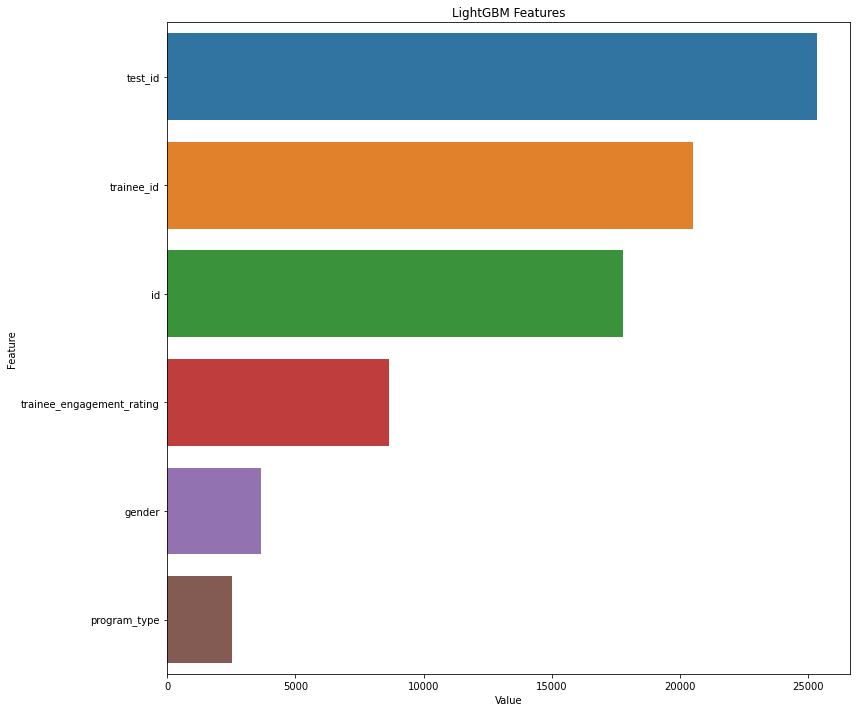

In [0]:
import seaborn as sns
feature_imp = pd.DataFrame(sorted(zip(lgbm.feature_importance(), X.columns), reverse=True)[:50], 
                           columns=['Value','Feature'])
plt.figure(figsize=(12, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()

In [0]:
Xtest = test

In [0]:
from sklearn.model_selection import KFold
from lightgbm import LGBMRegressor

errlgb = []
y_pred_totlgb = []

fold = KFold(n_splits=
             4, shuffle=True, random_state=101)

for train_index, test_index in fold.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    lgbm = LGBMRegressor(boosting_type='gbdt', num_leaves=500, max_depth=31, learning_rate=0.01, n_estimators=500, min_child_samples=20, subsample=0.9, bagging_fraction=0.90, feature_fraction=0.90, bagging_freq=1,bagging_seed=101)
    lgbm.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=0, early_stopping_rounds=100)

    y_pred_lgbm = lgbm.predict(X_test)
    print("RMSLE LGBM: ", sqrt(mean_squared_error(np.exp(y_test), np.exp(y_pred_lgbm))))

    errlgb.append(sqrt(mean_squared_error(np.exp(y_test), np.exp(y_pred_lgbm))))
    p = lgbm.predict(Xtest)
    y_pred_totlgb.append(p)

RMSLE LGBM:  0.7404853629105235
RMSLE LGBM:  0.7441919172543477
RMSLE LGBM:  0.7395971318469208
RMSLE LGBM:  0.7446070003905366


In [0]:
np.mean(errlgb,0)

0.7422203531005822

In [0]:
lgbm_final=y_pred_totlgb[1]

In [0]:
lgbm_final = np.mean(y_pred_totlgb,0)
lgbm_final

array([0.60145899, 0.9965456 , 0.73897962, ..., 0.84578103, 0.34886339,
       0.8579241 ])

In [0]:
submission = pd.DataFrame({
        "id": o1,
        "is_pass": lgbm_final
    })
submission.to_csv('./submission.csv', index=False)
print(submission)

              id   is_pass
0        1626_45  0.601459
1      11020_130  0.996546
2      12652_146  0.738980
3        7038_72  0.173481
4         888_71  0.278604
...          ...       ...
31344   18820_22  0.370073
31345    1641_96  0.935447
31346   7010_157  0.845781
31347  14895_179  0.348863
31348   9004_107  0.857924

[31349 rows x 2 columns]


In [0]:
from google.colab import files
files.download('submission.csv')

# 2nd Method

In [0]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(verbose=1, learning_rate=0.1, n_estimators=100, random_state=101, subsample=0.8)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_cv)
print("RMSLE LGBM: ", sqrt(mean_squared_error(np.exp(y_cv), np.exp(y_pred))))

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.2098           0.0023            5.90s
         2           0.2074           0.0023            5.52s
         3           0.2058           0.0018            5.40s
         4           0.2042           0.0014            5.32s
         5           0.2031           0.0014            5.20s
         6           0.2025           0.0011            5.11s
         7           0.2012           0.0007            5.04s
         8           0.2007           0.0008            5.02s
         9           0.1995           0.0006            4.97s
        10           0.1993           0.0005            4.90s
        20           0.1963           0.0002            4.52s
        30           0.1933           0.0002            3.97s
        40           0.1916           0.0001            3.37s
        50           0.1912           0.0000            2.78s
        60           0.1898          -0.0000            2.22s
       

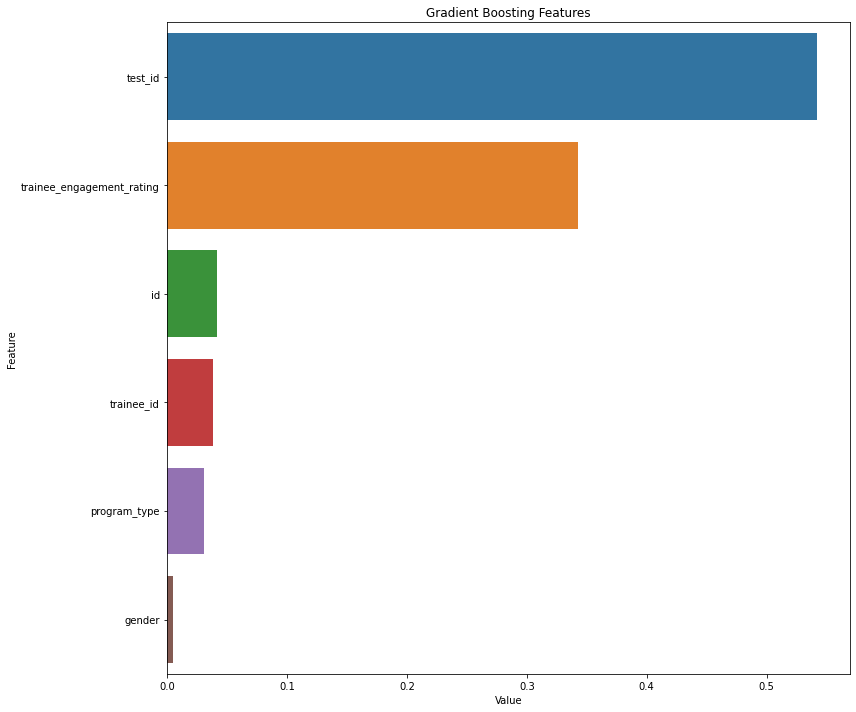

In [0]:
import seaborn as sns
feature_imp = pd.DataFrame(sorted(zip(gb.feature_importances_, X.columns), reverse=True)[:60], columns=['Value','Feature'])
plt.figure(figsize=(12,10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Gradient Boosting Features')
plt.tight_layout()
plt.show()

In [0]:
from math import sqrt 
from sklearn.metrics import accuracy_score, mean_squared_error

In [0]:
Xtest = test

In [0]:
from sklearn.model_selection import KFold

errgb = []
y_pred_totgb = []

fold = KFold(n_splits=4, shuffle=False, random_state=101)

for train_index, test_index in fold.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
             
    gb = GradientBoostingRegressor(learning_rate=0.1, n_estimators=200, random_state=101, subsample=0.8)
    gb.fit(X_train, y_train)
    y_pred = gb.predict(X_test)
    print("RMSLE LGBM: ", sqrt(mean_squared_error(np.exp(y_test), np.exp(y_pred))))
    errgb.append(sqrt(mean_squared_error(y_test, y_pred)))
    p = gb.predict(Xtest)
    y_pred_totgb.append(p)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RMSLE LGBM:  0.759890423974056
RMSLE LGBM:  0.7566902592630675
RMSLE LGBM:  0.7586268127139069
RMSLE LGBM:  0.7562226646104679


In [0]:
100-np.mean(errgb)

99.58215307890663

In [0]:
cat_final = np.mean(y_pred_totgb,0)
cat_final

array([0.62707364, 1.02756303, 0.66173657, ..., 0.79876272, 0.35157825,
       0.89237144])

In [0]:
submission = pd.DataFrame({
        "id": o1,
        "is_pass": cat_final
    })
submission.to_csv('./He_air.csv', index=False)
print(submission)

              id   is_pass
0        1626_45  0.627074
1      11020_130  1.027563
2      12652_146  0.661737
3        7038_72  0.153881
4         888_71  0.421238
...          ...       ...
31344   18820_22  0.622058
31345    1641_96  0.923519
31346   7010_157  0.798763
31347  14895_179  0.351578
31348   9004_107  0.892371

[31349 rows x 2 columns]


In [0]:
from google.colab import files
files.download('He_air.csv')

# Ensembling

In [48]:
!wget https://datahack-prod.s3.amazonaws.com/submissions/machine-learning-starter-program-hackathon/822_613210_us_submission_62.csv
!wget https://datahack-prod.s3.amazonaws.com/submissions/machine-learning-starter-program-hackathon/822_613210_us_submission_43.csv
!wget https://datahack-prod.s3.amazonaws.com/submissions/machine-learning-starter-program-hackathon/822_613210_us_submission_2.csv

--2020-04-30 17:05:02--  https://datahack-prod.s3.amazonaws.com/submissions/machine-learning-starter-program-hackathon/822_613210_us_submission_62.csv
Resolving datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)... 52.219.66.84
Connecting to datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)|52.219.66.84|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 873560 (853K) [application/vnd.ms-excel]
Saving to: ‘822_613210_us_submission_62.csv’

822_613210_us_submi 100%[===================>] 853.09K  1.63MB/s    in 0.5s    

2020-04-30 17:05:03 (1.63 MB/s) - ‘822_613210_us_submission_62.csv’ saved [873560/873560]

--2020-04-30 17:05:05--  https://datahack-prod.s3.amazonaws.com/submissions/machine-learning-starter-program-hackathon/822_613210_us_submission_43.csv
Resolving datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)... 52.219.66.84
Connecting to datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)|52.219.66.84|:44

In [0]:
a=pd.read_csv('822_613210_us_submission_62.csv')
b=pd.read_csv('822_613210_us_submission_62.csv')
c=pd.read_csv('822_613210_us_submission_62.csv')

In [0]:
d=a['is_pass']*0.6+b['is_pass']*0.25+c['is_pass']*0.15

In [53]:
submission = pd.DataFrame({
        "id": o1,
        "is_pass": d
    })
submission.to_csv('./submission.csv', index=False)
print(submission)

              id   is_pass
0        1626_45  0.508281
1      11020_130  1.027730
2      12652_146  0.476420
3        7038_72 -0.082806
4         888_71  0.514408
...          ...       ...
31344   18820_22  0.283195
31345    1641_96  0.989869
31346   7010_157  0.855409
31347  14895_179  0.384601
31348   9004_107  0.751918

[31349 rows x 2 columns]


In [0]:
from google.colab import files
files.download('submission.csv')